In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
training_data=pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
test_data=pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')

In [121]:
print("Training Data: {}".format(training_data.shape))
print("Any Null Values In the Training Data: {}".format(training_data.isnull().values.any()))

Training Data: (7352, 563)
Any Null Values In the Training Data: False


In [122]:
print("Test Data: {}".format(test_data.shape))
print("Any Null Values In the Test Data: {}".format(test_data.isnull().values.any()))

Test Data: (2947, 563)
Any Null Values In the Test Data: False


In [123]:
X_train=training_data.iloc[:,:-2]
y_train=training_data.iloc[:,-1]

X_test=test_data.iloc[:,:-2]
y_test=test_data.iloc[:,-1]

In [124]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())

([<matplotlib.patches.Wedge at 0x7ff5e0759f90>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

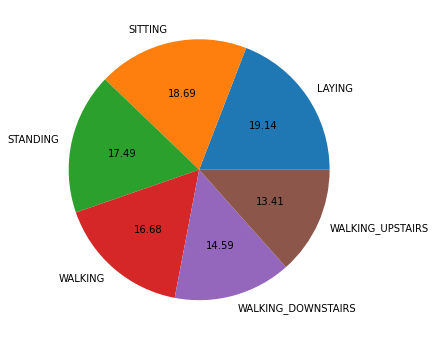

In [125]:
plt.figure(figsize=(16,6))
plt.pie(Category_count,labels=activity, autopct = '%0.2f')

In [126]:
acc=0
gyro=0
others=0
for column in training_data.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1

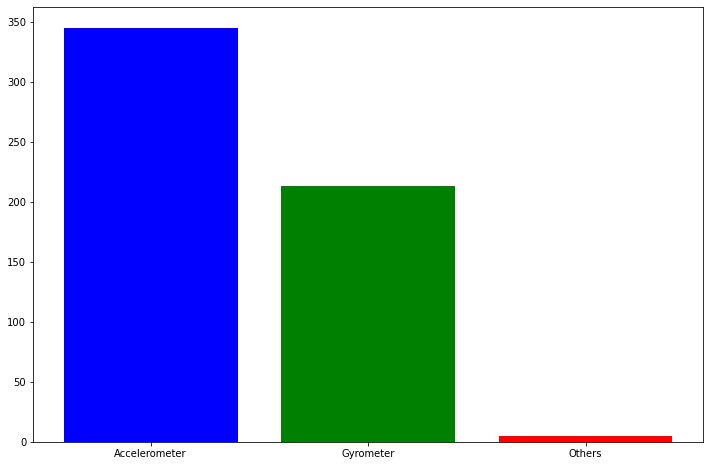

In [127]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['b','g','r']);

In [128]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [129]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [131]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [132]:
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [133]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [161]:
model=Sequential()
model.add(Dense(units=128,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [162]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [163]:
history=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
58/58 [==============================] - 0s 7ms/step - loss: 1.3866 - accuracy: 0.3479 - val_loss: 0.9150 - val_accuracy: 0.5002
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 0.5272 - accuracy: 0.6862 - val_loss: 0.3208 - val_accuracy: 0.8432
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 0.1435 - accuracy: 0.9493 - val_loss: 0.2492 - val_accuracy: 0.9108
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.1461 - val_accuracy: 0.9464
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9922 - val_loss: 0.1597 - val_accuracy: 0.9460
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.1590 - val_accuracy: 0.9474
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.1504 - val_accuracy: 0.9528
Epoch 8/100
5

58/58 [==============================] - 0s 5ms/step - loss: 1.3479e-05 - accuracy: 1.0000 - val_loss: 0.2116 - val_accuracy: 0.9637
Epoch 58/100
58/58 [==============================] - 0s 5ms/step - loss: 1.2743e-05 - accuracy: 1.0000 - val_loss: 0.2110 - val_accuracy: 0.9637
Epoch 59/100
58/58 [==============================] - 0s 5ms/step - loss: 1.2158e-05 - accuracy: 1.0000 - val_loss: 0.2135 - val_accuracy: 0.9640
Epoch 60/100
58/58 [==============================] - 0s 5ms/step - loss: 1.1567e-05 - accuracy: 1.0000 - val_loss: 0.2129 - val_accuracy: 0.9637
Epoch 61/100
58/58 [==============================] - 0s 6ms/step - loss: 1.1057e-05 - accuracy: 1.0000 - val_loss: 0.2142 - val_accuracy: 0.9637
Epoch 62/100
58/58 [==============================] - 0s 5ms/step - loss: 1.0539e-05 - accuracy: 1.0000 - val_loss: 0.2143 - val_accuracy: 0.9637
Epoch 63/100
58/58 [==============================] - 0s 5ms/step - loss: 1.0149e-05 - accuracy: 1.0000 - val_loss: 0.2153 - val_accuracy

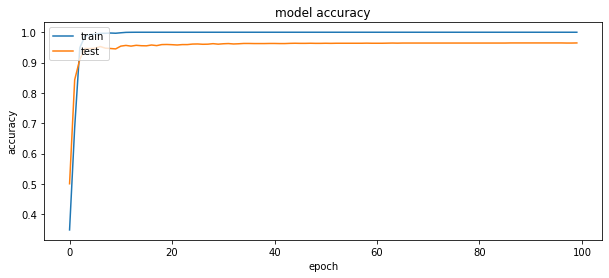

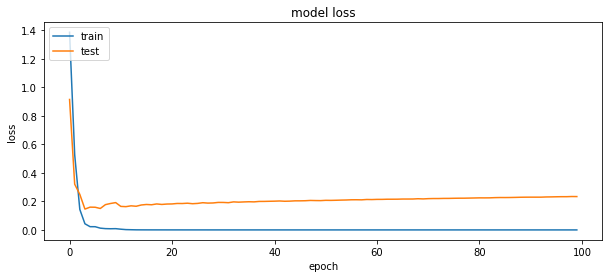

In [164]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [165]:
y_pred=model.predict(X_test)

In [166]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [167]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5])

In [168]:
y_pred_class

array([2, 2, 2, ..., 5, 5, 5])

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class) * 100
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 445,  45,   1,   0,   0],
       [  0,  15, 517,   0,   0,   0],
       [  4,   0,   0, 489,   0,   3],
       [  0,   0,   0,   1, 404,  15],
       [  0,   0,   0,  19,   1, 451]])

In [194]:
accuracy

96.47098744485918

In [195]:
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()

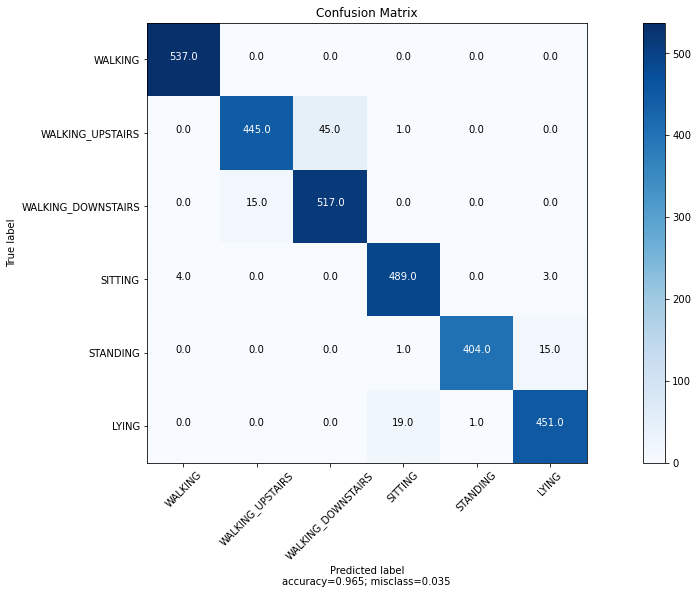

In [198]:
plot_confusion_matrix(cm =  np.array([[537.0,   0.0,   0.0,   0.0,   0.0,   0.0],
                                      [  0.0, 445.0,  45.0,   1.0,   0.0,   0.0],
                                      [  0.0,  15.0, 517.0,   0.0,   0.0,   0.0],
                                      [  4.0,   0.0,   0.0, 489.0,   0.0,   3.0],
                                      [  0.0,   0.0,   0.0,   1.0, 404.0,  15.0],
                                      [  0.0,   0.0,   0.0,  19.0,   1.0, 451.0]]), 
                      normalize    = False,
                      target_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"],
                      title        = "Confusion Matrix")